 **OBJECTIVE**

The core objective of this project is to analyze the key drivers of sales volume and build a predictive model for e-commerce sales. This involves leveraging transactional data, pricing information, and dedicated marketing investment metrics to derive actionable strategies for maximizing revenue.

In [ ]:
#Importing essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
order = pd.read_csv('Ecommerce_Sales_Prediction_Dataset.csv')

In [ ]:
order.sample(10) #Sample of the data of Ecommerce

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
656,18-10-2024,Electronics,870.22,27.89,Premium,599.13,33
694,25-11-2024,Electronics,245.17,14.29,Premium,6532.90,23
911,30-06-2025,Home Decor,223.88,13.28,Occasional,7660.55,31
348,15-12-2023,Fashion,274.36,23.56,Premium,5722.95,38
248,06-09-2023,Sports,887.12,43.01,Premium,2728.41,23
52,22-02-2023,Sports,507.17,44.35,Premium,397.26,36
581,04-08-2024,Toys,519.67,39.45,Premium,904.17,31
133,14-05-2023,Toys,265.31,3.24,Occasional,4127.37,13
207,27-07-2023,Home Decor,734.90,12.48,Premium,6189.78,34
313,10-11-2023,Electronics,162.36,49.18,Premium,4978.91,29


# Dataset Focus
The dataset is a synthetic collection of 1,000 transaction records designed for modeling and analysis. Key features used in the project will ***include:***

**1. Temporal & Product Data:** *Date, Product_Category, and Units_Sold.*

**2. Pricing Strategy:** *Price and Discount (percentage applied).*

**3. Marketing Effectiveness:** *The crucial column Marketing_Spend, which quantifies the budget allocated for sales efforts.*

In [ ]:
order.info() #their have some missing values in Discount(Numeric) and Customer_Segment(Categoric) columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          973 non-null    float64
 4   Customer_Segment  984 non-null    object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [ ]:
order.isnull().sum() #27 missing values in Discount(Numeric) and 16 missing values in Customer_Segment(Categoric)

,0
Date,0
Product_Category,0
Price,0
Discount,27
Customer_Segment,16
Marketing_Spend,0
Units_Sold,0


# HANDLING MISSING VALUES

In [ ]:
#Before performing EDA we need to fill those missing values.
#by pandas
#order['Discount'].fillna(order['Discount'].mean(),inplace=True)
#order['Customer_Segment'].fillna(order['Customer_Segment'].mode()[0],inplace=True)
#by sklearn
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean')
categoric_imputer = SimpleImputer(strategy='most_frequent')
order['Discount'] = numeric_imputer.fit_transform(order[['Discount']])
order['Customer_Segment']=categoric_imputer.fit_transform(order[['Customer_Segment']]).ravel()

In [ ]:
print(order.columns)

Index(['Date', 'Product_Category', 'Price', 'Discount', 'Customer_Segment',
       'Marketing_Spend', 'Units_Sold'],
      dtype='object')


In [ ]:
#Train_Test split
x_train , x_test , y_train , y_test = train_test_split(order.drop('Units_Sold',axis=1),order['Units_Sold'],test_size=0.2)

#Normalization for better result.
After normalize we observed that their is no point of normalize that data by StandardScaler and RobustScaler or MinMaxScaler So we just do with the previous data.
Lets see the kde plot of Price , Discount , Marketing_spend

/tmp/ipython-input-2725884993.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=order['Price'])
/tmp/ipython-input-2725884993.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=order['Discount'])
/tmp/ipython-input-2725884993.py:9: UserWarning: 

`distplot` is a deprecated function and wi

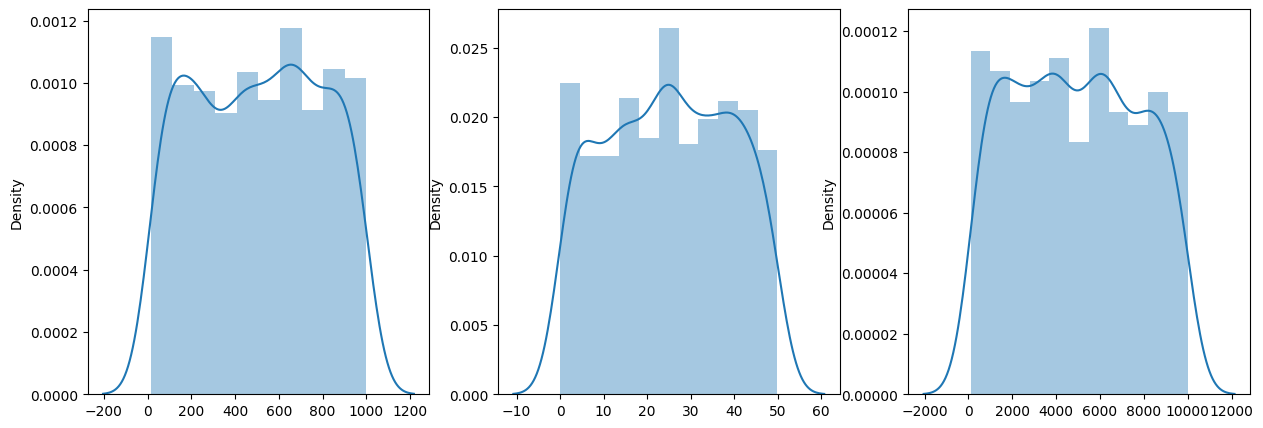

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(x=order['Price'])

plt.subplot(1,3,2)
sns.distplot(x=order['Discount'])

plt.subplot(1,3,3)
sns.distplot(x=order['Marketing_Spend'])
plt.show()

# Encoding the product_category and Cutomer_segment

In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
ohe = OneHotEncoder(drop='first')
oe = OrdinalEncoder(categories=[['Occasional','Regular','Premium']])

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([
    ('ohe',ohe,['Product_Category']),
    ('oe',oe,['Customer_Segment'])
],
   remainder='passthrough' )

In [ ]:
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

array([[0.0, 0.0, 0.0, ..., 718.81, 24.899373072970196, 8003.1],
       [0.0, 0.0, 1.0, ..., 85.37, 44.51, 2225.49],
       [0.0, 0.0, 0.0, ..., 693.1, 48.2, 1710.34],
       ...,
       [0.0, 0.0, 1.0, ..., 950.46, 38.6, 2541.92],
       [0.0, 1.0, 0.0, ..., 77.49, 25.95, 7865.61],
       [0.0, 0.0, 1.0, ..., 253.94, 21.84, 4716.36]], dtype=object)

In [ ]:
x_train = pd.DataFrame(x_train,columns=ct.get_feature_names_out())
x_test = pd.DataFrame(x_test,columns=ct.get_feature_names_out())

In [ ]:
# Drop the 'remainder__Date' column which contains string dates
# This column is created when 'Date' is passed through the ColumnTransformer
if 'remainder__Date' in x_train.columns:
    x_train = x_train.drop('remainder__Date', axis=1)
    x_test = x_test.drop('remainder__Date', axis=1)


In [ ]:
x_train

,ohe__Product_Category_Fashion,ohe__Product_Category_Home Decor,ohe__Product_Category_Sports,ohe__Product_Category_Toys,oe__Customer_Segment,remainder__Price,remainder__Discount,remainder__Marketing_Spend
0,0.0,0.0,0.0,1.0,2.0,718.81,24.899373,8003.1
1,0.0,0.0,1.0,0.0,2.0,85.37,44.51,2225.49
2,0.0,0.0,0.0,0.0,0.0,693.1,48.2,1710.34
3,0.0,1.0,0.0,0.0,1.0,236.17,30.19,4555.58
4,0.0,0.0,0.0,0.0,2.0,622.43,5.03,622.38
...,...,...,...,...,...,...,...,...
795,0.0,1.0,0.0,0.0,2.0,582.6,38.77,3840.61
796,0.0,0.0,0.0,0.0,1.0,451.55,14.11,401.59
797,0.0,0.0,1.0,0.0,0.0,950.46,38.6,2541.92
798,0.0,1.0,0.0,0.0,2.0,77.49,25.95,7865.61


# Performed Exploratory Data Analysis (EDA) to uncover trends, seasonality, and


In [ ]:
order

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17
...,...,...,...,...,...,...,...
995,22-09-2025,Fashion,740.06,49.06,Regular,1890.83,34
996,23-09-2025,Electronics,517.10,28.48,Premium,8011.66,21
997,24-09-2025,Electronics,683.43,12.98,Occasional,3408.51,19
998,25-09-2025,Sports,51.26,21.85,Occasional,7335.62,26


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [ ]:
order['Date'] = pd.to_datetime(order['Date'], format='%d-%m-%Y')

In [ ]:
order['year'] = order['Date'].dt.year
order['month'] = order['Date'].dt.month
order['day'] = order['Date'].dt.day

Text(0, 0.5, 'Total Units Sold')

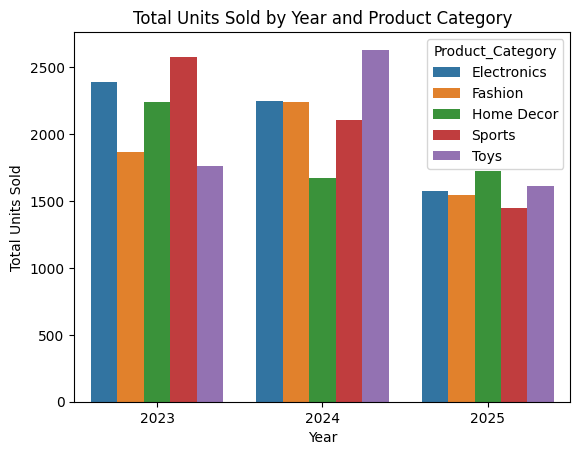

In [ ]:
#year trend analysis
# Group by both year and Product_Category to use hue effectively
yearly_category_sales = order.groupby(['year', 'Product_Category'])['Units_Sold'].sum().reset_index()

# Plot using seaborn.barplot for better handling of hue
sns.barplot(data=yearly_category_sales, x='year', y='Units_Sold', hue='Product_Category')
plt.title('Total Units Sold by Year and Product Category')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')


In [ ]:
# 1. Define the mapping dictionary
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# 2. Apply the map to the 'month' column and store the result in a new column
order['month_Name'] = order['month'].map(month_map)

In [ ]:
#Month trend analysis according to Product_Category
# Group by both month and Product_Category and Customer_Segment to use hue effectively
monthly_category_sales = order.groupby(['month_Name', 'Product_Category','Customer_Segment'])['Units_Sold'].sum().reset_index()

# Plot using seaborn.barplot for better handling of hue
monthly_category_sales.sort_values('Units_Sold',ascending = False)

,month_Name,Product_Category,Customer_Segment,Units_Sold
87,July,Toys,Occasional,387
68,January,Home Decor,Regular,325
92,June,Electronics,Regular,317
130,May,Sports,Premium,315
6,April,Home Decor,Occasional,303
...,...,...,...,...
36,December,Home Decor,Occasional,42
154,October,Fashion,Regular,37
159,October,Sports,Premium,36
43,December,Toys,Premium,33


In [ ]:
#According to days
daily_category_sales = order.groupby(['day', 'Product_Category'])['Units_Sold'].sum().reset_index()
daily_category_sales.sort_values(by=['day', 'Units_Sold'], ascending=[True, False], inplace=True)
daily_category_sales.reset_index(drop=True)
#

,day,Product_Category,Units_Sold
0,1,Home Decor,343
1,1,Toys,246
2,1,Sports,180
3,1,Fashion,152
4,1,Electronics,80
...,...,...,...
150,31,Toys,169
151,31,Electronics,125
152,31,Home Decor,110
153,31,Fashion,103


In [ ]:
# 1. Group the DataFrame by the 'day' column.
# 2. Find the index of the maximum value in the 'Units_Sold' column within each group (day).
idx = daily_category_sales.groupby('day')['Units_Sold'].idxmax()

# 3. Use these indices to select the corresponding rows from the original DataFrame.
top_selling_per_day = daily_category_sales.loc[idx]

# Display the resulting DataFrame
print(top_selling_per_day.reset_index(drop=True))
#

    day Product_Category  Units_Sold
0     1       Home Decor         343
1     2           Sports         252
2     3       Home Decor         289
3     4           Sports         300
4     5      Electronics         311
5     6             Toys         318
6     7             Toys         313
7     8           Sports         267
8     9       Home Decor         310
9    10      Electronics         332
10   11           Sports         227
11   12             Toys         241
12   13          Fashion         243
13   14           Sports         247
14   15          Fashion         313
15   16          Fashion         361
16   17          Fashion         269
17   18       Home Decor         233
18   19          Fashion         291
19   20             Toys         256
20   21           Sports         331
21   22       Home Decor         217
22   23      Electronics         238
23   24      Electronics         373
24   25      Electronics         317
25   26           Sports         356
2

# **Trained multiple regression models (Linear Regression, Random Forest) to predict the number of Unit Sold**


# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
model1 = lr.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error,accuracy_score

# Using R-squared (R2 score) for regression models
r2 = r2_score(y_test, y_pred1)
print(f"R2 Score: {r2}")

# Optionally, you can also print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred1)
print(f"Mean Absolute Error: {mae}")


R2 Score: -0.01696080904286057
Mean Absolute Error: 5.812472413045723


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
model2 = rf.fit(x_train,y_train.ravel())

/tmp/ipython-input-3027067607.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model2 = rf.fit(x_train,y_train.ravel())


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred2 = model2.predict(x_test)

# Using R-squared (R2 score) for regression models
r2 = r2_score(y_test, y_pred2)
print(f"R2 Score: {r2}")

# Optionally, you can also print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred2)
print(f"Mean Absolute Error: {mae}")

R2 Score: -0.11209622404291508
Mean Absolute Error: 5.9947


In [ ]:
# --- FOR VISUALIZATION PURPOSES, WE'LL USE A DUMMY DATAFRAME ---
# Create a DataFrame to hold the actual values and predictions
results_df = pd.DataFrame({
    'Actual_Units_Sold': y_test,
    'Linear_Reg_Prediction': model1.predict(x_test),
    'Random_Forest_Prediction': model2.predict(x_test)
})
results_df

,Actual_Units_Sold,Linear_Reg_Prediction,Random_Forest_Prediction
234,38,30.548171,31.34
471,26,29.479712,28.61
729,21,29.065248,26.37
813,22,30.783761,25.75
294,38,29.735053,30.84
...,...,...,...
79,15,28.876649,30.00
428,39,30.287246,31.29
288,35,29.353727,30.88
890,42,28.604422,31.18


# Visualization Of the Plots

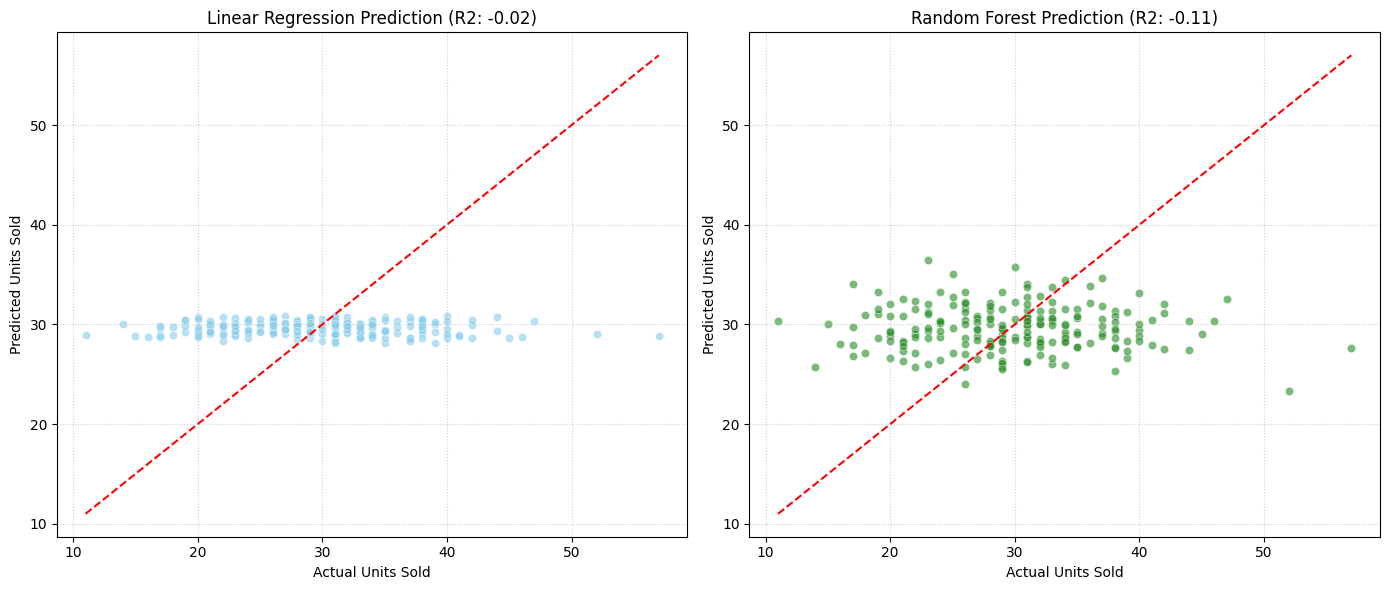

In [ ]:
# --- Scatter Plot Visualization Code ---

plt.figure(figsize=(14, 6))

# Define the common reference line (y=x) for perfect prediction
max_val = max(results_df['Actual_Units_Sold'].max(),
              results_df['Linear_Reg_Prediction'].max(),
              results_df['Random_Forest_Prediction'].max())
min_val = min(results_df['Actual_Units_Sold'].min(),
              results_df['Linear_Reg_Prediction'].min(),
              results_df['Random_Forest_Prediction'].min())

# Calculate the range for the diagonal line
line_range = [min_val, max_val]

# --- Subplot 1: Linear Regression ---
plt.subplot(1, 2, 1)
sns.scatterplot(x='Actual_Units_Sold', y='Linear_Reg_Prediction', data=results_df, color='skyblue', alpha=0.6)
plt.plot(line_range, line_range, color='red', linestyle='--', label='Perfect Fit')
plt.title(f'Linear Regression Prediction (R2: {r2_score(y_test, results_df["Linear_Reg_Prediction"]):.2f})', fontsize=12)
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.grid(True, linestyle=':', alpha=0.6)

# --- Subplot 2: Random Forest Regression ---
plt.subplot(1, 2, 2)
sns.scatterplot(x='Actual_Units_Sold', y='Random_Forest_Prediction', data=results_df, color='forestgreen', alpha=0.6)
plt.plot(line_range, line_range, color='red', linestyle='--', label='Perfect Fit')
plt.title(f'Random Forest Prediction (R2: {r2_score(y_test, results_df["Random_Forest_Prediction"]):.2f})', fontsize=12)
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.grid(True, linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

# **CONCLUSION:** THIS DATA IS NOT AT ALL LINEAR SO WE CAN'T APPLY INEAR REGRESSION OR RANDOM FOREST.